In [2]:
# Esta primera línea solo es para Jupyter

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pandas.plotting import scatter_matrix


# load_titanic_training_data carga los valores de train.csv en la variable de retorno en formato df de pandas

def load_titanic_training_data(train_path = "datasets/titanic"):
    csv_path = os.path.join(train_path, "train.csv")
    return pd.read_csv(csv_path)

# load_titanic_test_data carga los valores de test.csv en la variable de retorno en formato df de pandas

def load_titanic_test_data(test_path = "datasets/titanic"):
    csv_path = os.path.join(test_path, "test.csv")
    return pd.read_csv(csv_path)

In [3]:
# Guardamos el dataframe de training en "titanic"

titanic = load_titanic_training_data()

# Guardamos el dataframe de test en "titanic_test"

titanic_test = load_titanic_test_data()

# Muestra las primeras 5 filas de titanic

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Info del dataset

titanic.info()

# Age tiene sobre 150 valores vacios, cabin tiene 700 vacios y embarked 2 vacios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
# Muestra los distintos valores de las columnas Object (Name no) y cuántos registros de cada valor hay

print(titanic['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [15]:
print(titanic['Ticket'].value_counts())

347082           7
CA. 2343         7
1601             7
3101295          6
347088           6
CA 2144          6
382652           5
S.O.C. 14879     5
2666             4
347077           4
113781           4
19950            4
LINE             4
PC 17757         4
4133             4
W./C. 6608       4
349909           4
17421            4
113760           4
248727           3
24160            3
PC 17755         3
29106            3
PC 17572         3
13502            3
C.A. 31921       3
SC/Paris 2123    3
110152           3
345773           3
363291           3
                ..
341826           1
3460             1
2648             1
36209            1
347087           1
348124           1
223596           1
349217           1
2625             1
2697             1
315090           1
112059           1
363294           1
S.O./P.P. 751    1
347464           1
2003             1
244310           1
7553             1
A/5 3594         1
312993           1
349251           1
A/5 21172   

In [16]:
print(titanic['Cabin'].value_counts())

C23 C25 C27        4
B96 B98            4
G6                 4
F2                 3
C22 C26            3
E101               3
F33                3
D                  3
D26                2
C2                 2
B22                2
C68                2
B28                2
B20                2
B49                2
B58 B60            2
D17                2
C126               2
B57 B59 B63 B66    2
E25                2
C123               2
D36                2
E121               2
B51 B53 B55        2
C124               2
E44                2
C65                2
D20                2
C125               2
F4                 2
                  ..
D11                1
C104               1
D45                1
C50                1
B39                1
A14                1
C46                1
A23                1
B30                1
D10 D12            1
E17                1
E58                1
C70                1
C99                1
C90                1
A32                1
B73          

In [17]:
print(titanic['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [6]:
# Resumen de los datos numéricos 

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


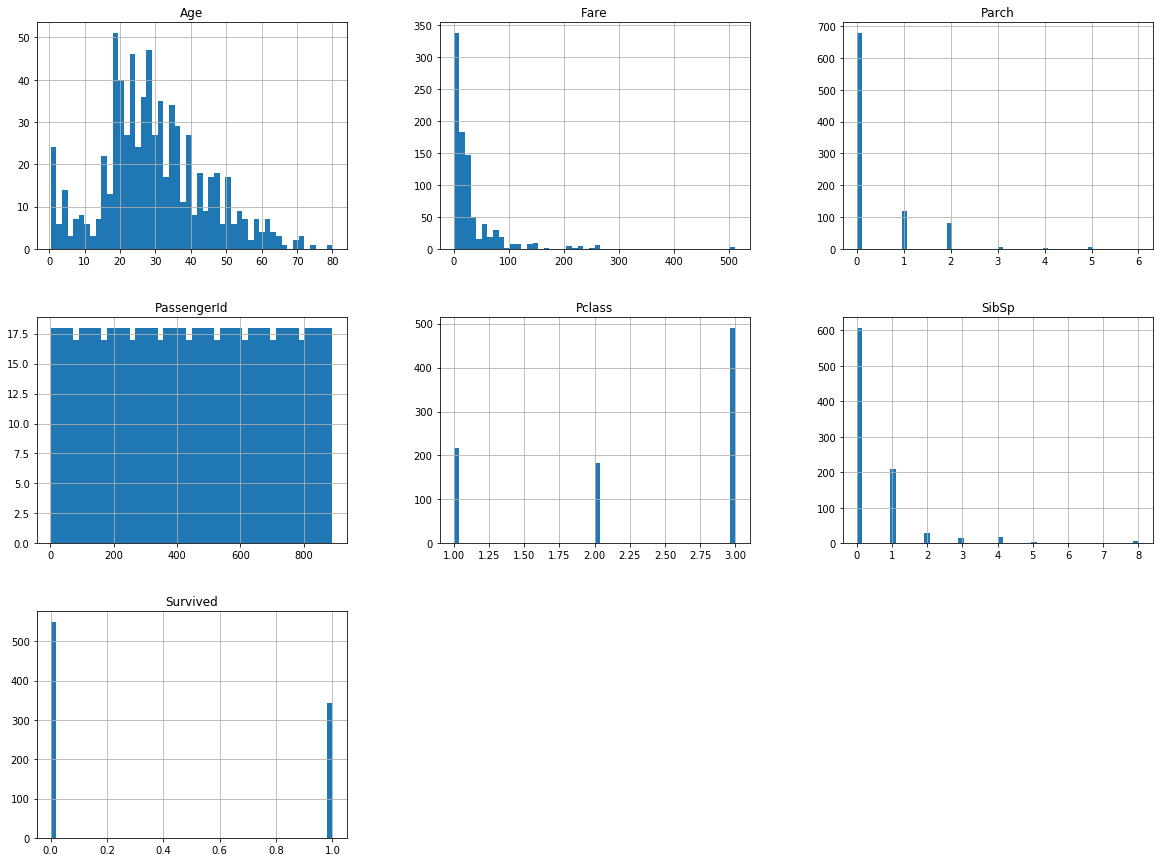

In [7]:
# Muestra un histograma para cada atributo numérico

titanic.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#"standard correlation coefficient", también llamado R de Pearson, entre cada par de atributos, usando corr()

corr_matrix = titanic.corr()

# Y mostramos cuánta correlación hay entre la supervivencia y el resto de atributos

corr_matrix["Survived"].sort_values(ascending = False)

# Cuando el valor es positivo un atributo crece si el otro crece (más directamente cuanto más cerca de 1): 
# Survived sube si Fare sube. La gente que pagó más sobrevivió más, y la gente con mayor Parch sobrevivió más.
# Si es negativo funciona al contrario: Survived decrece cuando aumenta Pclass. De nuevo, la gente
# que viajaba en mejor clase sobrevivió más.
# Tambien se ve que Survived decrece ligeramente según aumenta la edad del pasajero. Lo mismo según aumenta SibSp
# Si el valor es cercano a 0 no parece haber correlación (PassengerId)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [9]:
# No se si se puede visualizar algo más interesante

In [10]:
# Empezamos a preparar datos para ML